# Name : Muhammad Ashir Khan
# Rollno: 22p9039
# Section: BSCS 6A

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Qno1

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
178,179,Male,59,93,14


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)



In [25]:
df['Cluster'].value_counts()

Cluster
1    87
0    63
2    50
Name: count, dtype: int64

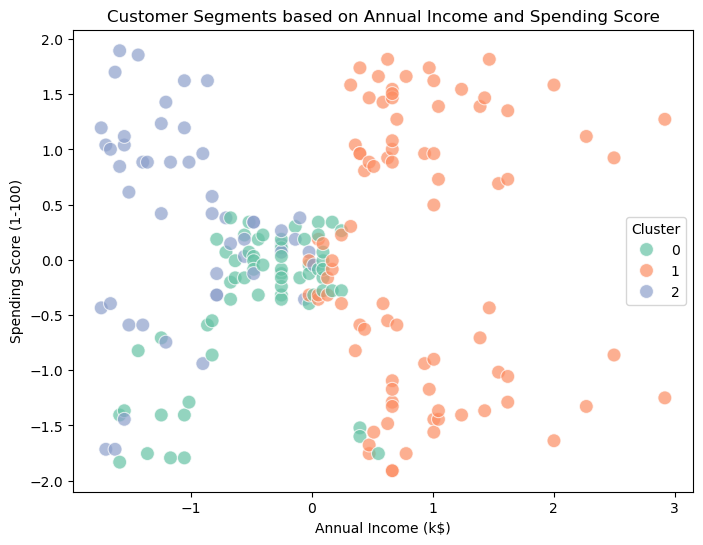

In [26]:
scaled_df['Cluster'] = df['Cluster']
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df['Annual Income (k$)'],
    y=scaled_df['Spending Score (1-100)'],
    hue=scaled_df['Cluster'],
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('Customer Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## Qno2

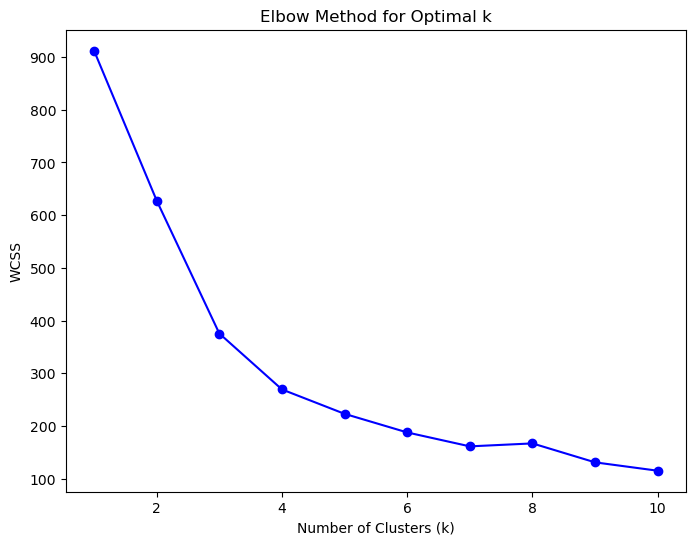

In [28]:
wcss = []
K=range(1,11)

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [29]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f'For k = {k}, Silhouette Score = {score:.3f}')


For k = 2, Silhouette Score = 0.295
For k = 3, Silhouette Score = 0.419
For k = 4, Silhouette Score = 0.456
For k = 5, Silhouette Score = 0.437
For k = 6, Silhouette Score = 0.429
For k = 7, Silhouette Score = 0.416
For k = 8, Silhouette Score = 0.394
For k = 9, Silhouette Score = 0.395
For k = 10, Silhouette Score = 0.397


In [30]:
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(scaled_df)


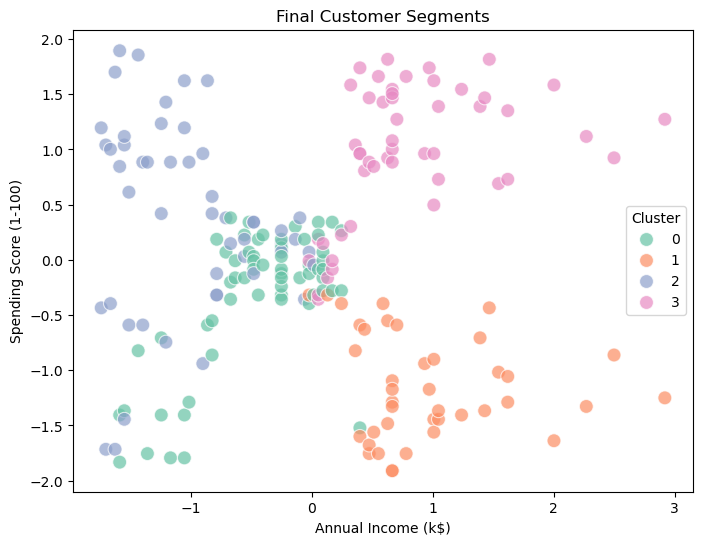

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df['Annual Income (k$)'],
    y=scaled_df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('Final Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()